<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# https://youtu.be/gvImQJTrJps

In [2]:
from IPython.display import YouTubeVideo

# YouTubeVideo('Jml7NVYm8cs')

In [3]:
# %pwd

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
# df.head()

In [5]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [6]:
# See an example of whatt I will change - notice white space at beginning & end, punctuation & any capitalization
df['full_review_text'][2]

" 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee?  I would categorize this as a pricier coffee place but, to me it was worth it.  After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles.  There is ample parking in the private lot and  ordering is done through I-Pads.  Pick a seat and they will call your name when your items are ready.  Be patient because some of the coffee drinks take longer than others.  I had the cold brew coffee, chicken and waffles and we shared a pop+art!  The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside.  The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce.  I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up.  The coffee here is spot on and I

In [7]:
""" CLEAN THE DATA """

# Adjust cells width
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
# pd.set_option('display.max_colwidth', None)

# Remove `.0 star rating ` from star_rating column
# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
df['star_rating'] = df['star_rating'].map(lambda x: x.rstrip('.0 star rating '))
df['star_rating'] = df['star_rating'].apply(lambda x: x.strip(' '))

# Eliminate white space
df['full_review_text'] = df['full_review_text'].apply(lambda x: x.strip())

# Make it all lower case
df['full_review_text'] = df['full_review_text'].apply(lambda x: x.lower())

# Remove punctuation
df['full_review_text'] = df['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', '', x))

############################################################################################################
# Remove what used to be the date and is now a bunch of numbers                                            #
# Isolate it into two parts                                                                                #
# df['full_review_text'] = df['full_review_text'].apply(lambda x: x.split(" ", 1))                         #
# Select it and overwrite it, eliminating the first part, the date numbers, while keeping the second part  #
# df['full_review_text'] = df['full_review_text'].apply(lambda x: x[1])                                    #
# Seperate each word into quotes                                                                           #
# df['full_review_text'] = df['full_review_text'].apply(lambda x: x.split(" "))                            #
############################################################################################################

# See
df.head(1)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11252016 1 checkin love love loved the atmosph...,5


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [9]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
df['tokens'] = df['full_review_text'].apply(tokenize)

In [11]:
df.head(1)

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11252016 1 checkin love love loved the atmosph...,5,"[checkin, love, love, loved, the, atmosphere, ..."


In [12]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [13]:
# Count Function to count tokens
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [14]:
word_count_df = count(df['tokens'])
word_count_df

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
42,the,6847,34809,1.0,0.045412,0.045412,0.899028
22,and,6864,26651,2.0,0.034769,0.080180,0.901261
35,a,6246,22756,3.0,0.029687,0.109868,0.820116
45,i,5532,20249,4.0,0.026417,0.136284,0.726366
61,to,5653,17164,5.0,0.022392,0.158676,0.742253
...,...,...,...,...,...,...,...
19837,roomier,1,1,19839.0,0.000001,0.999995,0.000131
19838,windowed,1,1,19840.0,0.000001,0.999996,0.000131
19839,actuality,1,1,19841.0,0.000001,0.999997,0.000131
19840,crass,1,1,19842.0,0.000001,0.999999,0.000131


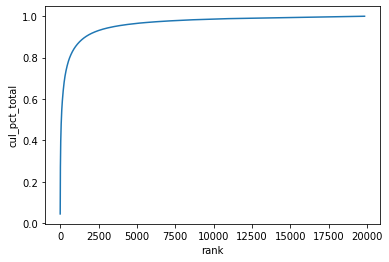

In [15]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=word_count_df);

Per the CDP above, I can see that a large majority of the reviews of the coffee shops contain a small number of words as most often used in the average review.
"A small number of words represent most of the total count of occurrences."

[Cumulative Distribution Plot explained](https://youtu.be/gvImQJTrJps?t=3237)

### Do I understand this right?  
Of almost 20,000 different words, `the` occours .045412 percent of the time in each (average) review?  
`and` - .034769  
`a` - .029687  
...

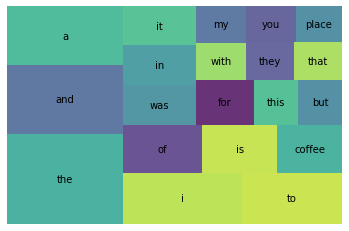

In [16]:
wc_top20 = word_count_df[word_count_df['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

### High level spacy & `nlp=spacy.load('en_core_web_lg')` [explained](https://youtu.be/gvImQJTrJps?t=3950)
And how to do this with spacy  
Stop words [explained](https://youtu.be/gvImQJTrJps?t=4323)

In [17]:
# Spacy's Default Stop Words
# nlp.Defaults.stop_words

In [18]:
# Remove Stop Words from dataset
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [19]:
df.tokens.head(3)

0    [11252016, 1, checkin, love, love, loved, atmo...
1    [1222016, listed, date, night, austin, ambianc...
2    [11302016, 1, checkin, listed, brunch, spots, ...
Name: tokens, dtype: object

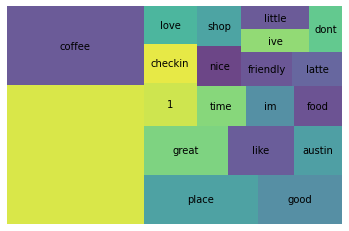

In [20]:
# Visualize Results of taking out the stop words
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [21]:
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','checkin', 'place', 'shop', 'like', 'ive', 'latte', 'food', 'austin', 
                                            'im','1','2','3','4','5','6','7','8','9','0',' '])

In [22]:
# Check again
tokens = []

for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
142,good,2788,3973,1.0,0.011669,0.011669,0.366071
103,great,2836,3919,2.0,0.011510,0.023179,0.372374
3,love,1500,1935,3.0,0.005683,0.028863,0.196954
492,time,1469,1884,4.0,0.005533,0.034396,0.192883
47,nice,1463,1741,5.0,0.005113,0.039510,0.192096


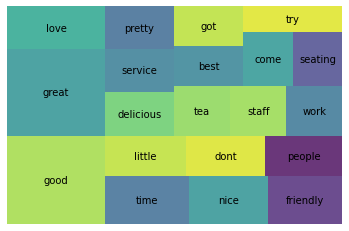

In [23]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [24]:
df['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [25]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

df['lemmas'] = df['full_review_text'].apply(get_lemmas)

In [26]:
# Run the count stuff to make it do some things
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('good', 3973),
 ('great', 3919),
 ('love', 1935),
 ('time', 1884),
 ('nice', 1741),
 ('friendly', 1659),
 ('little', 1504),
 ('dont', 1453),
 ('people', 1424),
 ('delicious', 1402)]

In [27]:
# See the ratings
df['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [33]:
# See the ratings in good/bad
df['star_rating'] = df['star_rating'].replace({'1': 'bad', '2': 'bad', '3': 'bad', '4': 'good', '5': 'good'})
df

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11252016 1 checkin love love loved the atmosph...,good,"[11252016, love, love, loved, atmosphere, corn...","[11252016, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,1222016 listed in date night austin ambiance i...,good,"[1222016, listed, date, night, ambiance, beaut...","[1222016, list, date, night, ambiance, beautif..."
2,The Factory - Cafe With a Soul,11302016 1 checkin listed in brunch spots i lo...,good,"[11302016, listed, brunch, spots, loved, eclec...","[11302016, list, brunch, spot, love, eclectic,..."
3,The Factory - Cafe With a Soul,11252016 very cool decor good drinks nice seat...,bad,"[11252016, cool, decor, good, drinks, nice, se...","[11252016, cool, decor, good, drink, nice, sea..."
4,The Factory - Cafe With a Soul,1232016 1 checkin they are located within the ...,good,"[1232016, located, northcross, mall, shopping,...","[1232016, locate, northcross, mall, shopping, ..."
...,...,...,...,...,...
7611,The Steeping Room,2192015 i actually step into this restaurant b...,good,"[2192015, actually, step, restaurant, chance, ...","[2192015, actually, step, restaurant, chance, ..."
7612,The Steeping Room,1212016 ok the steeping room is awesome how do...,good,"[1212016, ok, steeping, room, awesome, great, ...","[1212016, ok, steeping, room, awesome, great, ..."
7613,The Steeping Room,4302015 loved coming here for tea and the atmo...,good,"[4302015, loved, coming, tea, atmosphere, pret...","[4302015, love, come, tea, atmosphere, pretty,..."
7614,The Steeping Room,822015 the food is just average the booths did...,bad,"[822015, average, booths, didnt, feel, clean, ...","[822015, average, booth, not, feel, clean, wai..."


In [35]:
# See the ratings again
df['star_rating'].value_counts()

good    6140
bad     1476
Name: star_rating, dtype: int64

In [37]:
df['number_of_tokens'] = [len(x) for x in df['tokens']]
df.groupby('star_rating', as_index=False)['number_of_tokens'].mean()

,star_rating,number_of_tokens
0,bad,50.952575
1,good,43.203257


In [39]:
df.groupby('coffee_shop_name', as_index=False)['number_of_tokens'].mean()

,coffee_shop_name,number_of_tokens
0,Alta’s Cafe,42.990000
1,Anderson’s Coffee Company,49.750000
2,Apanas Coffee & Beer,41.404412
3,Arturo’s Underground Cafe,45.320000
4,Bennu Coffee,46.780000
...,...,...
74,Thunderbird Coffee,47.790000
75,Trianon Coffee,41.112245
76,Tuscany At 360,48.787879
77,Venezia Italian Gelato,37.790000


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [42]:
# Set the good and bad
good = df[df['star_rating'] == 'good']
bad = df[df['star_rating'] == 'bad']

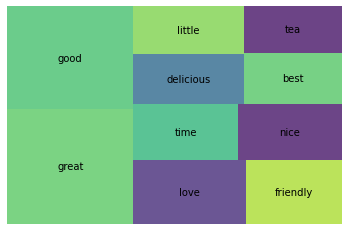

In [46]:
# Top good
goodwc = count(good['tokens'])
wc_top10 = goodwc[goodwc['rank'] <= 10]

squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

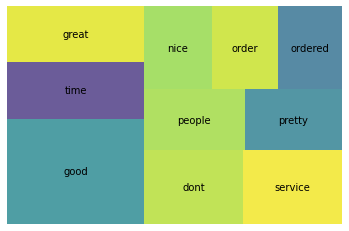

In [47]:
# Top bad
badwc = count(bad['tokens'])
wc_top10 = badwc[badwc['rank'] <= 10]

squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

